# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов и поучаствовать в соревновании на Kaggle!
Первым делом вам предстоит построить хороший бейзлайн, а дальше пытаться улучшать, соревнуясь с другими участниками.


Ссылка на соревнование: https://www.kaggle.com/c/avito-category-prediction/overview
Данные для домашнего задания можно скачать на странице соревнования.
Чтобы ваше участие было засчитано, убедитесь, что имя в Leaderboard имеет вид: «Имя Фамилия номер_группы».

Оценивание:

Домашнее задание оценивается как обычно. Баллы указаны напротив заданий.

За соревнование даются бонусные баллы следующим образом.
Если вы пересекли baseline_2 на приватном лидерборде, ваша оценка равна 

10 - 10 * (i - 1) / M

где M — количество студентов, принявших участие в соревновании;

i — место (начиная с 1) студента в приватном лидерборде среди всех таких студентов.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

* В течение 3 суток после окончания соревнования в соответствующее задание на anytask необходимо прислать код, воспроизводящий ответы для посылки, фигурирующей в приватном лидерборде. В случае отсутствия кода, воспроизводящего результат, в установленный срок студенту выставляется 0 в качестве оценки за соревнование. Если не оговорено иное, использовать любые внешние данные в соревнованиях '''запрещено'''. Под внешними данными понимаются размеченные данные, где разметка имеет прямое отношение к решаемой задаче. Грубо говоря, сборник текстов с википедии не считается внешними данными.


Мы будем работать с датасетом объявлений Avito. Нам предстоит по заголовку и тексту объявления предсказывать категорию объявления.

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('avito-text-classification/train.csv')
test = pd.read_csv('avito-text-classification/test.csv')

In [4]:
train.head()

,title,description,Category_name,Category
0,"Эбу Renault / Nissan 1,5 DCI Delphi 2001-2008 год","Комплект ЭБУ (мозги, компьютер мотора, двигате...",Запчасти и аксессуары,10
1,Утюг утп 1000 ватт СССР 1987 год,Продам/\n Фото № 1-2 /\n /\nУтюг УТП 1000 ватт...,Бытовая техника,21
2,Возвму машину с выкупом,Возьму машину в аренду с последующим выкупом н...,Предложение услуг,114
3,Полусапожки,"полусапожки в отличном состоянии, один раз оде...","Одежда, обувь, аксессуары",27
4,Босоножки кожаные,"Кожаные(натур) босоножки Karlo Pasolini, 40 рр...","Одежда, обувь, аксессуары",27


In [4]:
train.shape

(4234042, 4)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [5]:
train.isnull().any()

title            False
description       True
Category_name    False
Category         False
dtype: bool

In [6]:
test.isnull().any()

title          False
description     True
itemid         False
dtype: bool

In [3]:
train.fillna('', inplace=True)
test.fillna('', inplace=True)

In [4]:
print( train.isnull().any().any(), test.isnull().any().any() )

False False


## Задание 2 (0.5 балла)
Сконкатенируйте заголовок и описание в единую строку и поместите результат в отдельный столбец. Таким образом мы будет работать с одним текстом, а не с двумя.

In [5]:
train['text'] = train['title'] + ' ' + train['description']
train.drop(['title', 'description'], axis=1, inplace=True)

In [6]:
test['text'] = test['title'] + ' ' + test['description']
test.drop(['title', 'description'], axis=1, inplace=True)

## Задание 3 (0.5 балла)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Сколько всего уникальных классов необходимо предсказать?
2. Постройте столбчатую диаграмму распределения по классам. Нормализуйте график, чтобы видеть доли, а не абсолютные значения.
3. На сколько большой дисбаланс? Какой класс имеет самую большую долю в выборке (укажите класс и долю), какой класс наименьшую (укажите класс и долю).

In [48]:
# 1
train['Category_name'].value_counts().size

50

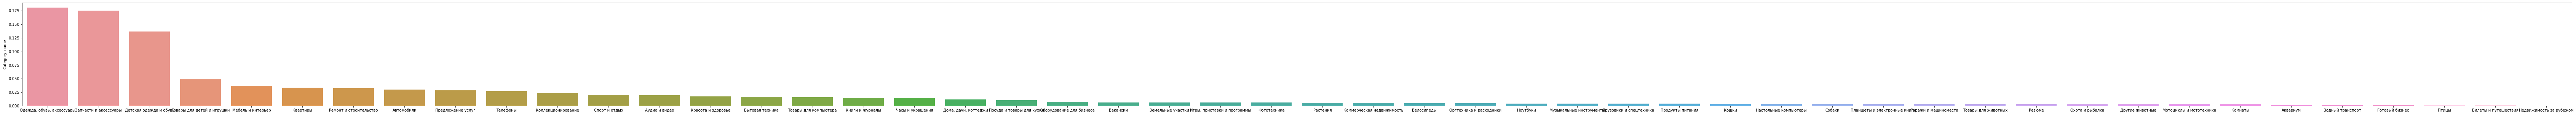

In [49]:
# 2
import pylab as plt
import seaborn as sns

fig_dims = (120, 5)
fig, ax = plt.subplots(figsize=fig_dims)

ax = sns.barplot(
    ax=ax,
    x=train['Category_name'].value_counts(normalize=True).index, 
    y=train['Category_name'].value_counts(normalize=True),
    dodge=False
)

# дабл клик, чтобы увеличить, просматривать горизонтальным скроллом.

In [50]:
# 3
print(train['Category_name'].value_counts().idxmax(), "| доля:", round(train['Category_name'].value_counts().max() / train.shape[0], 2), '%')
print(train['Category_name'].value_counts().idxmin(), "  | доля:", round(train['Category_name'].value_counts().min() / train.shape[0], 7), '%')


Одежда, обувь, аксессуары | доля: 0.18 %
Недвижимость за рубежом   | доля: 3.9e-05 %


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью. Для test части нам неизвестны истинные значения, и они понадобятся только тогда, когда мы будем отправлять решение на Kaggle.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [51]:
# 1
from sklearn.feature_extraction.text import CountVectorizer
cnt_vec = CountVectorizer()

X = cnt_vec.fit_transform(train['text'])

In [52]:
# 2
X.shape  # 2125805  записи

(4234042, 2125805)

## Задание 5 (0.5 балла)

В предыдущем пункте у вас должная была получится очень большая матрица. Это не дело.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле _vocabulary инстанса этого класса.

1. Найдите в этом словаре все слова, которые начинаются на цифру. Сколько таких слов нашлось?

2. Найдите все слова, которые начинаются на символы пунктуации. Сколько таких слов нашлось? 

In [ ]:
# Можно убрать len(...), чтобы посмотреть содержимое

In [53]:
# 1
len([x for x in cnt_vec.get_feature_names() if x[0].isdigit()])

610944

In [54]:
# 2
import string
len([x for x in cnt_vec.get_feature_names() if x[0] in string.punctuation])

2043

## Задание 6 (2.5 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью word_tokenizer из пакета nltk
2. Удалит все токены содержащие числа и пунктуацию
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords('russian')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функии на самом первом описании товара в датасете.

Важно: так как функию будет необходимо запускать на большом корпусе, подумайте об эффективной реализации. Постарайтесь решить задачу в минимальное количество циклов и копирований.

Референсная реализация на компьютере автора работала 230 секунд на 100к строчек.

In [7]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from string import punctuation, digits

def tokenizer(s: str) -> list:
    """
    My custom tokenizer using sets
    """
    
    stemmer = SnowballStemmer('russian')
    compare = set(punctuation) | set(digits) | set(stopwords.words('russian'))
    result = [stemmer.stem(x) for x in word_tokenize(s.lower()) if len(x) > 2 and len({x} & compare) == 0]
  
    return result
    

In [8]:
tokenizer('Джинсы на девочку Джинсы теплые махра на девочку, новые размер написан 80 см,маломер подойдут на  худенькую девочку 68-74 см . Если нужно сделаю замеры.')

['джинс',
 'девочк',
 'джинс',
 'тепл',
 'махр',
 'девочк',
 'нов',
 'размер',
 'написа',
 'маломер',
 'подойдут',
 'худеньк',
 'девочк',
 '68-74',
 'нужн',
 'сдела',
 'замер']

## Задание 7 (1 балл)

1. Возьмите случайные 500к строк из датасета. Постройте по ним CountVectorizer с применением вашего токенизатора.
2. Разбейте полученную матрицу на train, test в отношении 4 к 1. Не забудьте про target переменную.
3. Обучите SGDClassifier на полученной выборке.
4. Посчитайте метрику accuracy

In [9]:
# 1
random_data = train.sample(100000)

In [10]:
random_data

,Category_name,Category,text
4142640,Посуда и товары для кухни,87,"Чайный сервиз з-д «Пролетарий» Чайный сервиз, ..."
323844,Детская одежда и обувь,29,Костюм Крокид зима 104-110 Продам костюм Кроки...
1064444,Детская одежда и обувь,29,"Ботинки Ботинки в отличном состоянии, натур.кожа"
4146547,Детская одежда и обувь,29,Пижамы в комплекте-2шт Описание прилагается к ...
736215,Предложение услуг,114,"Грумер (стрижка собак и кошек) Здравствуйте, /..."
...,...,...,...
3163615,Запчасти и аксессуары,10,Mazda 6 mps подкрылок правый оригинал Без дефе...
3252818,Спорт и отдых,39,Связки и суставы NOW Hyaluronic Acid with MSM ...
902410,"Одежда, обувь, аксессуары",27,"Платье Платье с накидкой. Вечернее, облегающее."
1003642,Автомобили,9,"Mazda CX-7, 2011 Отличное внешнее и техническо..."


In [11]:
# 2
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(random_data['text'], random_data['Category'], test_size=0.2, random_state=2021)

In [12]:
%%time

# 3, 4

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score

sgd = Pipeline([
    ('vect', CountVectorizer(tokenizer=tokenizer)),
    ('clf', SGDClassifier(loss='modified_huber', random_state=2021, n_jobs=8)),
    ])

sgd.fit(X_train, y_train)

sgd_y_pred = sgd.predict(X_test)


# classification_report(y_test, sgd_y_pred)
accuracy_score(y_test, sgd_y_pred)

CPU times: user 3min 23s, sys: 6.77 s, total: 3min 30s
Wall time: 2min 55s


0.78865

In [15]:
print("test:", accuracy_score(y_test, sgd_y_pred))

print(classification_report(y_test, sgd_y_pred))

test: 0.78865
              precision    recall  f1-score   support

           9       0.93      0.82      0.87       608
          10       0.87      0.95      0.91      3564
          11       0.86      0.55      0.67        22
          14       0.80      0.40      0.53        40
          19       0.76      0.58      0.66       614
          20       0.79      0.72      0.75       773
          21       0.78      0.62      0.69       341
          23       0.86      0.83      0.85        53
          24       0.99      0.97      0.98       695
          25       1.00      0.96      0.98       228
          26       0.97      0.98      0.97       113
          27       0.68      0.90      0.77      3573
          28       0.89      0.76      0.82       317
          29       0.73      0.86      0.79      2680
          30       0.79      0.72      0.75      1004
          31       0.89      0.65      0.75        62
          32       0.84      0.61      0.71       371
          33 

## Задание 8 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество.
2. Мы можем еще сильнее уменьшите размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

sgd = Pipeline([
    ('vect', TfidfVectorizer(tokenizer=tokenizer, max_df=0.9)),
    ('clf', SGDClassifier(loss='modified_huber', penalty='l2', alpha=1e-3, random_state=2021, max_iter=5, tol=None)),
    ])

sgd.fit(X_train, y_train)

sgd_y_pred = sgd.predict(X_test)

accuracy_score(y_test, sgd_y_pred)

0.77445

In [18]:
print("test:", accuracy_score(y_test, sgd_y_pred))

print(classification_report(y_test, sgd_y_pred))

test: 0.77445
              precision    recall  f1-score   support

           9       0.88      0.83      0.85       608
          10       0.70      0.97      0.82      3564
          11       1.00      0.50      0.67        22
          14       0.50      0.03      0.05        40
          19       0.75      0.52      0.61       614
          20       0.75      0.73      0.74       773
          21       0.83      0.62      0.71       341
          23       0.92      0.68      0.78        53
          24       0.95      1.00      0.97       695
          25       0.93      0.98      0.96       228
          26       0.97      0.98      0.98       113
          27       0.73      0.92      0.81      3573
          28       0.82      0.79      0.81       317
          29       0.83      0.81      0.82      2680
          30       0.79      0.73      0.76      1004
          31       0.72      0.42      0.53        62
          32       0.76      0.68      0.72       371
          33 

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

sgd = Pipeline([
    ('vect', TfidfVectorizer(tokenizer=tokenizer, max_df=0.9)),
    ('clf', SGDClassifier(random_state=2021, n_jobs=-1))
    ])

sgd.fit(X_train, y_train)

sgd_y_pred = sgd.predict(X_test)

accuracy_score(y_test, sgd_y_pred)

0.83415

In [20]:
print("test:", accuracy_score(y_test, sgd_y_pred))

print(classification_report(y_test, sgd_y_pred))

test: 0.83415
              precision    recall  f1-score   support

           9       0.88      0.88      0.88       608
          10       0.87      0.96      0.91      3564
          11       0.82      0.82      0.82        22
          14       0.89      0.20      0.33        40
          19       0.77      0.69      0.73       614
          20       0.74      0.80      0.77       773
          21       0.77      0.74      0.76       341
          23       0.94      0.85      0.89        53
          24       0.96      1.00      0.98       695
          25       0.94      0.98      0.96       228
          26       0.97      0.99      0.98       113
          27       0.81      0.92      0.86      3573
          28       0.81      0.89      0.85       317
          29       0.87      0.83      0.85      2680
          30       0.81      0.77      0.79      1004
          31       0.68      0.69      0.69        62
          32       0.75      0.80      0.77       371
          33 

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Задание 9 (1 балл)
Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 30000.
2. Какой из трех подходов показал самый высокий результат?

In [22]:
from sklearn.feature_extraction.text import HashingVectorizer


pipe = Pipeline([
    ('vect', HashingVectorizer(tokenizer=tokenizer, n_features=30000)),
    ('clf', SGDClassifier(random_state=2021, n_jobs=8)),
    ])

pipe.fit(X_train, y_train)
pipe_y_pred = sgd.predict(X_test)

accuracy_score(y_test, pipe_y_pred)

/opt/conda/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


0.83415

## Задание 10 (1.5 балла)

Пришло время выйти в мир. Отправляйтесь на Kaggle Inclass и сделайте первую посылку. Там вы найдете инструкцию как сформировать файл с предсказаниями и отправить его.